In [6]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [7]:
root_path = "/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/final"
output_fig_path = '/Users/cdq/Desktop/opensource/FedPrompt/figs/overall'
# roberta-large
filenames_list = {
    "agnews": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "mnli": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yahoo": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yelp-full": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
}

# per batch latency, bs = 4, msl = 256
train_latency_list = {"tx2+bitfit": 1, "tx2+full": 2}
infer_latency_list = {"tx2+bitfit": 0.5, "tx2+full": 1}
communication_latency_list = {"bitfit": 1000 * 2 / 1000 / 1, "full": 1000 * 2 / 1}

labels = ["FedCLS", "Ours", "Ours+", "Ours++"]

In [8]:
datasets = {"agnews": 1,"mnli": 0, "yahoo": 5, "yelp-full": 0} # "agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 100, "yelp-full": 0.001, "mnli": 0.001}
seed = 99
# plot hyper-para.
colors=['r','g','b','y','c','m','k'] * 100
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

/Users/cdq/Desktop/opensource/FedPrompt/data/overall-performance/final/agnews/all_100/seed_99/pattern_1/alpha_1_beta_0_gamma_0.001/fedcls.log
max accuracy is 0.6023684210526317, round is 19
            0
0        0.25
1        0.25
2        0.25
3    0.359737
4    0.426579
..        ...
171  0.555658
172  0.555658
173  0.555526
174  0.555526
175  0.555526

[176 rows x 1 columns]
range(0, 176)
[[0.2688172 ]
 [0.2688172 ]
 [0.2688172 ]
 [0.38681381]
 [0.45868704]
 [0.49405772]
 [0.47156197]
 [0.48231466]
 [0.47764573]
 [0.47679683]
 [0.491794  ]
 [0.49830221]
 [0.53975665]
 [0.54088851]
 [0.54400113]
 [0.57484437]
 [0.58177702]
 [0.59309564]
 [0.58757782]
 [0.64770798]
 [0.64006791]
 [0.60667799]
 [0.62535371]
 [0.62096774]
 [0.6147425 ]
 [0.61134692]
 [0.61460102]
 [0.60964912]
 [0.61049802]
 [0.60936616]
 [0.60908319]
 [0.60795133]
 [0.60681947]
 [0.60611205]
 [0.60483871]
 [0.6041313 ]
 [0.6032824 ]
 [0.60285795]
 [0.60271647]
 [0.60271647]
 [0.60229202]
 [0.60186757]
 [0.60172609]
 [

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[[0.64926429]
 [0.69793435]
 [0.73641766]
 [0.71703452]
 [0.76825127]
 [0.7696661 ]
 [0.79286927]
 [0.91737408]
 [0.8582343 ]
 [0.87323147]
 [0.87577816]
 [0.91397849]
 [0.91864743]
 [0.91610074]
 [0.91737408]
 [0.92091115]
 [0.91794001]
 [0.90959253]
 [0.91525184]
 [0.90421619]
 [0.90195246]
 [0.91921336]
 [0.89233164]
 [0.94227504]
 [0.93307866]
 [0.94241653]
 [0.9196378 ]
 [0.93732315]
 [0.93732315]
 [0.93675722]
 [0.93251273]
 [0.92105263]
 [0.93307866]
 [0.93208829]
 [0.89770798]
 [0.93307866]
 [0.89898132]
 [0.89714205]
 [0.94284097]
 [0.89728353]
 [0.91567629]
 [0.95373514]
 [0.95062252]
 [0.9172326 ]
 [0.9336446 ]
 [0.92176005]
 [0.93322015]
 [0.91751556]
 [0.93675722]
 [0.94185059]
 [0.94991511]
 [0.94114318]
 [0.94807583]
 [0.90718732]
 [0.92006225]
 [0.90732881]
 [0.94213356]
 [0.93336163]
 [0.94227504]
 [0.92176005]
 [0.95090549]
 [0.92727787]
 [0.94722694]
 [0.94071873]
 [0.93505942]
 [0.93463497]
 [0.92232598]
 [0.9368987 ]
 [0.94779287]
 [0.92529711]
 [0.93548387]
 [0.9

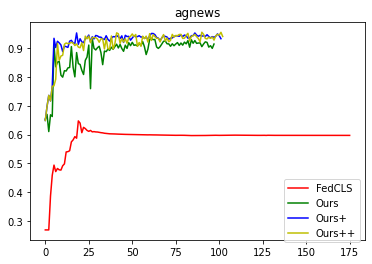

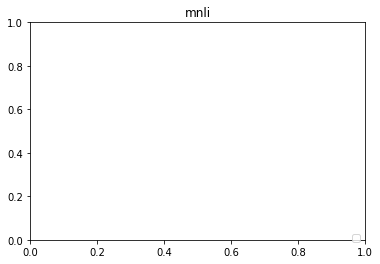

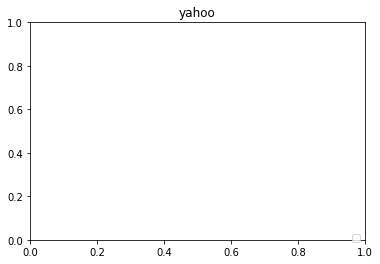

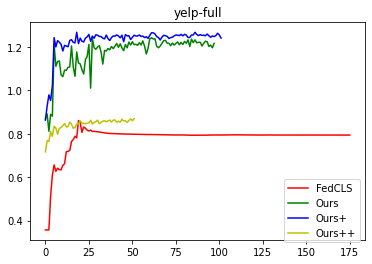

In [9]:
# round to accuracy
# i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in filenames_list:

    log_root_path = os.path.join(root_path,f"{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}")

    filenames = filenames_list[dataset]

    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
        log_path = os.path.join(log_root_path,filename)

        iter = 1000
        phrase = 'aggregated model performance is'

        if not os.path.exists(log_path):
            print(f"{log_path} not exist")
            continue
        
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') 

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        print(df)
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(range(iter))
        print(np.array(y_mean)/full_set_acc[dataset])
        print(colors[filenames.index(filename)])

        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(os.path.join(output_fig_path, f"final-{dataset}-roberta-large-round2accuracy.pdf"))

[1, 63]


ValueError: zero-size array to reduction operation maximum which has no identity

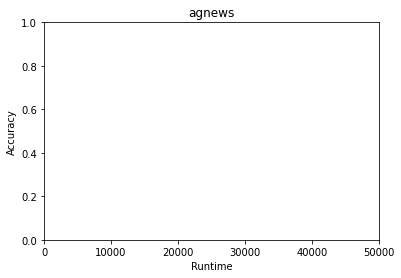

In [13]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
xlim = {"agnews": 5000, "mnli": 1000, "yahoo": 1000, "yelp-full": 1000}
for dataset in datasets:

    log_root_path = os.path.join(root_path,f"{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}")
    
    fig = plt.figure()
    plt.title(dataset)
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    plt.xlim(0,50000)
    
    filenames = filenames_list[dataset]

    for filename in filenames:

        log_path = os.path.join(log_root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                train_samples = list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]
                infer_samples = list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]

                if filenames.index(filename) <= 1:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    print(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:])
                    train_time = np.max(train_samples) * train_latency_list["tx2+full"] if len(train_samples) > 0 else 0
                    infer_time = np.max(infer_samples) * infer_latency_list["tx2+full"] if len(infer_samples) > 0 else 0
                else:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    train_time = np.max(train_samples) * train_latency_list["tx2+bitfit"] if len(train_samples) > 0 else 0
                    infer_time = np.max(infer_samples) * infer_latency_list["tx2+bitfit"] if len(infer_samples) > 0 else 0
                
                if filenames.index(filename) <= 1:
                    comm_time = communication_latency_list["full"]
                else:
                    comm_time = communication_latency_list["bitfit"]

                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        # idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        # print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        # runtime_list[dataset].append(runtime[idx])
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        
        plt.plot(runtime[:len(y_mean)],np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4)
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    fig.savefig(os.path.join(output_fig_path, f"final-{dataset}-roberta-large-time2accuracy.pdf"))

In [ ]:
acc_list